In [22]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [24]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 8)                 800       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.6927 - accuracy: 0.5300 - val_loss: 0.6921 - val_accuracy: 0.5614
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6912 - accuracy: 0.5790 - val_loss: 0.6901 - val_accuracy: 0.5958
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6880 - accuracy: 0.6211 - val_loss: 0.6855 - val_accuracy: 0.6286
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6802 - accuracy: 0.6524 - val_loss: 0.6734 - val_accuracy: 0.6708
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6523 - accuracy: 0.6977 - val_loss: 0.6253 - val_accuracy: 0.7074
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6062 - accuracy: 0.7132 - val_loss: 0.5939 - val_accuracy: 0.7230
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5802 - accuracy: 0.7271 - val_loss: 0.5710 - val_ac

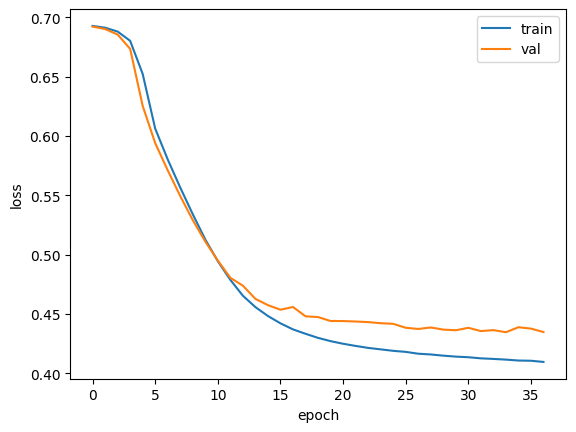

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
from tensorflow import keras
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [29]:
model2.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_8 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 39ms/step - loss: 0.6928 - accuracy: 0.5235 - val_loss: 0.6924 - val_accuracy: 0.5398
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6918 - accuracy: 0.5543 - val_loss: 0.6912 - val_accuracy: 0.5718
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6901 - accuracy: 0.5967 - val_loss: 0.6890 - val_accuracy: 0.6080
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6867 - accuracy: 0.6194 - val_loss: 0.6839 - val_accuracy: 0.6488
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6770 - accuracy: 0.6572 - val_loss: 0.6652 - val_accuracy: 0.6784
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6376 - accuracy: 0.6990 - val_loss: 0.6141 - val_accuracy: 0.7050
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6042 - accuracy: 0.7050 - val_loss: 0.5931 - val_ac

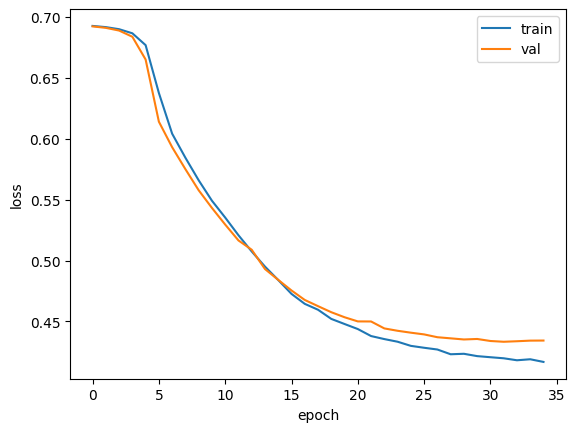

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_8 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [33]:
# LSTM 2개 층 연결
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_9 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_10 (LSTM)              (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 71ms/step - loss: 0.6926 - accuracy: 0.5243 - val_loss: 0.6921 - val_accuracy: 0.5580
Epoch 2/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6901 - accuracy: 0.5881 - val_loss: 0.6882 - val_accuracy: 0.5788
Epoch 3/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6797 - accuracy: 0.6273 - val_loss: 0.6692 - val_accuracy: 0.6346
Epoch 4/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6349 - accuracy: 0.6724 - val_loss: 0.5979 - val_accuracy: 0.7034
Epoch 5/100
313/313 [==============================] - 23s 73ms/step - loss: 0.5684 - accuracy: 0.7180 - val_loss: 0.5528 - val_accuracy: 0.7284
Epoch 6/100
313/313 [==============================] - 24s 75ms/step - loss: 0.5424 - accuracy: 0.7348 - val_loss: 0.5290 - val_accuracy: 0.7434
Epoch 7/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5231 - accuracy: 0.7505 - val_loss: 0.5121 - val_ac

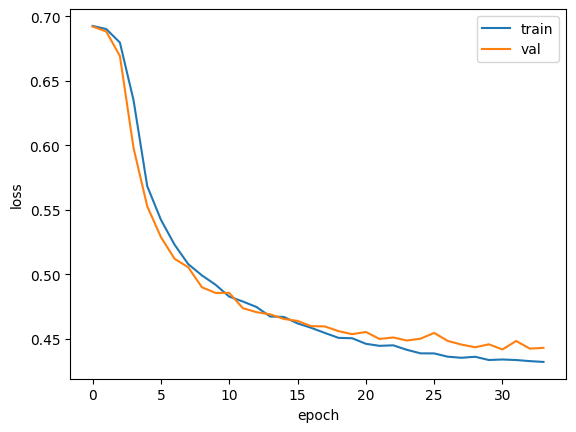

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
# GRU 모델
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [39]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6928 - accuracy: 0.5279 - val_loss: 0.6925 - val_accuracy: 0.5406
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6918 - accuracy: 0.5678 - val_loss: 0.6914 - val_accuracy: 0.5644
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6903 - accuracy: 0.5859 - val_loss: 0.6896 - val_accuracy: 0.5798
Epoch 4/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6877 - accuracy: 0.6004 - val_loss: 0.6864 - val_accuracy: 0.6050
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6831 - accuracy: 0.6166 - val_loss: 0.6805 - val_accuracy: 0.6212
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6742 - accuracy: 0.6334 - val_loss: 0.6688 - val_accuracy: 0.6404
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6568 - accuracy: 0.6557 - val_loss: 0.6445 - val_ac

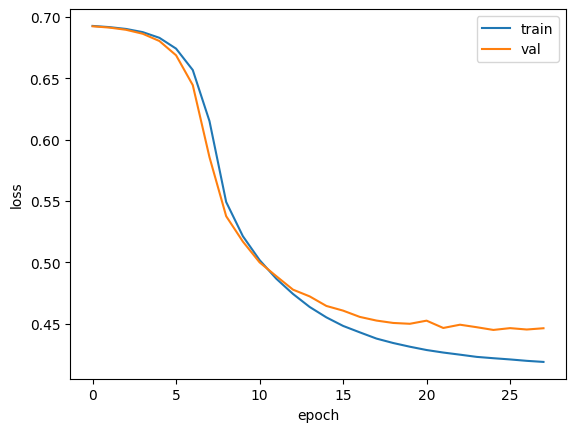

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 15ms/step - loss: 0.4377 - accuracy: 0.7957


[0.437735378742218, 0.7957199811935425]